## Clase para los predictores lineales

In [ ]:
import numpy as np

In [ ]:
class LinearPredictor:
    
    def __init__(self, n: int):
        """
        Input:
            n: Es la dimensión de los datos. 
        """
        
        self.theta = np.zeros(n + 1).reshape(-1, 1)
        
    def evaluate(self, x: list):
        theta = self.theta
        x = np.array(x).reshape(-1, 1)        
        return theta.T.dot(x)

In [3]:
class SyntheticData:
    
    def __init__(self, n: int):
        """
        Input: n la dimensión de los datos.
        """
        self.n = n
        self.xi = np.random.rand(n + 1).reshape(-1, 1)
        
    def generate(self, size_data, sigma):
        ones = np.ones(size_data).reshape(-1, 1)
        X = np.hstack((ones, np.random.rand(size_data, self.n)))
        epsilon = sigma * np.random.standard_normal(size_data)
        
        y = X.dot(self.xi) + epsilon.reshape(-1, 1)
        
        return X, y, self.xi     

In [4]:
def generate_batches(m, size_data, batchs, sigma):
    synthetic_data = SyntheticData(m)
    batches = [synthetic_data.generate(size_data, sigma) for _ in range(batchs)]
    return batches

In [5]:
def RMSE(matrix_theta, xi, k):
    matrix_theta = np.array(matrix_theta)
    xi = np.array(xi).reshape(-1, 1)
    arg = (1/k) * (matrix_theta - xi) ** 2 
    return np.sqrt(arg.sum(axis=1))

In [24]:
def loss(predictor, sample):
    m = len(sample[0])
    arg = list()
    for i in range(m):
        x_i = sample[0][i]
        y_i = sample[1][i]
        arg.append((predictor.evaluate(x_i) - y_i)**2)
    return 1/(2 * m) *  np.sum(arg)  

In [46]:
def euclidean_distance(theta, xi):
    arg = theta - xi
    return np.linalg.norm(arg)

In [97]:
def gd(predictor, X, Y, t, eta, gradient, xi=None, loss=None, epsilon=0):
    theta = predictor.theta
    iterations = 0
    distances_to_xi = list()
    if xi is not None:
        delta_theta_xi = theta.reshape(-1, 1) - xi.reshape(-1, 1) 
    errors = list()
    sample = tuple([X, Y])
    while iterations <= t:
        theta = theta - eta * gradient(theta, X, Y)
        predictor.theta = theta
        
        if loss is not None: 
            errors.append(loss(predictor, sample))
        
        if xi is not None:
            distances_to_xi.append(euclidean_distance(theta, xi))
            arg = theta - xi 
            delta_theta_xi = np.hstack((delta_theta_xi, arg))
        
        iterations += 1
    
    return predictor, errors, distances_to_xi, delta_theta_xi

In [98]:
def gradient(theta, X, Y):
    return X.T.dot((X.dot(theta) - Y))

In [111]:
m = 1
n_bachts = 30
batches = generate_batches(m=m, size_data=10, batchs=n_bachts, sigma=1.9)

In [112]:
thetas = list()
xis = list()
errors = list()
distances_to_xi = list()
deltas = list()
for batch in batches:
    X = batch[0]
    Y = batch[1]
    xi = batch[2]
    
    predictor = LinearPredictor(m)
    
    parameters = dict(
        predictor=predictor, 
        X=X,
        Y=Y,
        t=1000,
        eta=0.001,        
        gradient=gradient,
        xi=xi,
        loss=loss,
    )
    
    predictor, error, distance_to_xi, delta = gd(**parameters)
    errors.append(error)
    xis.append(xi)
    thetas.append(predictor.theta)
    distances_to_xi.append(distance_to_xi)
    deltas.append(delta)

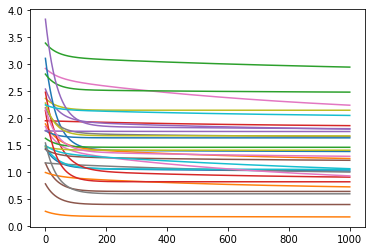

In [113]:
import matplotlib.pyplot as plt
for error in errors:
    plt.plot(error)

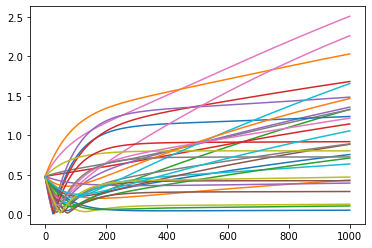

In [114]:
for distances in distances_to_xi:
    plt.plot(distances)

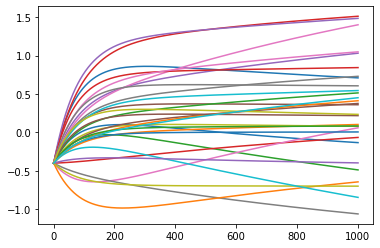

In [115]:
for i in range(n_bachts):
    plt.plot(deltas[i][0])    

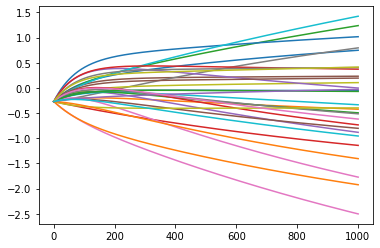

In [116]:
for i in range(n_bachts):
    plt.plot(deltas[i][1])   